#                Object Detection Team

Christopher Tetteh Nenebi (ctnenebi@aggies.ncat.edu)

Zackary Reid (zcreid@aggies.ncat.edu)

# Object detection with OpenCV-Python

# General overview of OpenCV ecosytem and its implementation

OpenCV is an open-source library for image processing, machine learning, and computer vision. 
With its extensive collection of tools and libraries, developers may work with photos and videos to recognize objects, 
faces, and even a person's handwriting. It also facilitates image processing, computer vision, and machine learning jobs.


OpenCV has a wide range of applications in fields like engineering, sports science, health, and agriculture. 
Gesture recognition, security and surveillance, autonomous cars, medical image analysis, robotics, augmented, 
and virtual reality, feature detection and matching, and image and video processing are a few prominent applications.

OpenCV represents images using a matrix data structure. In essence, an image is a two-dimensional array of pixel values, 
where each pixel might indicate either grayscale intensity or colour information in the case of colour images.

OpenCV is compatible with several computer languages, including C++, Python, and Java, and is made to run on a variety
of operating systems, including Windows, Linux, and macOS. For a broad spectrum of developers, it is accessible because of 
its cross-platform interoperability.

OpenCV covers both 2D and 3D data and can handle a wide range of image and video formats. Developers can deal with a variety
of visual data sources thanks to this versatility.

The use of OpenCV for object detection has gained popularity recently, but a wide range of technologies and applications 
have resulted from its implementation. 


# Object Detection
The goal of object detection is to locate and classify objects of interest within an image or video.

Object detection algorithms commonly utilize machine learning or deep learning techniques to get relevant outcomes. 
There exist two primary methodologies for object detection: neural network-based approaches and non-neural alternatives.
    
Non-neural methodologies encompass the utilization of several techniques, such as Haar cascades or 
Histogram of Oriented Gradients (HOG), to establish feature definitions. Subsequently, a classification process, such as 
support vector machine (SVM), is employed to do the classification task.

In contrast, neural methodologies possess the capability to perform object detection in an end-to-end manner, 
devoid of explicit feature definition. These methodologies commonly rely on convolutional neural networks (CNNs) which 
includes: Region-based Convolutional Neutral Networks (R-CNN), Fast R-CNN, Faster R-CNN, You Only Look Once (YOLO), and 
Single Shot Detector (SSD).

In [22]:
# Importing the OpenCV library 
import cv2 
import matplotlib.pyplot as plt


# Reading the image using imread() function 
image = cv2.imread('road_image.jpg') 

#print(type(image))

# Extracting the height and width of an image 
print(image.shape)
h, w = image.shape[:2] 

# Displaying the height and width 
print("Height = {}, Width = {}".format(h, w)) 


(1603, 2400, 3)
Height = 1603, Width = 2400


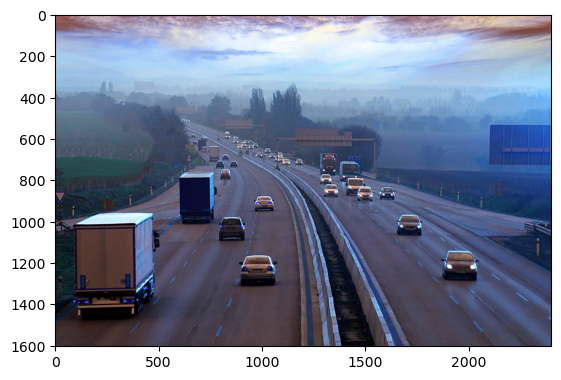

In [23]:
#plt.subplot(1, 1, 1)
plt.imshow(image)
plt.show()

In [24]:
# Extracting RGB values. 
# Here we have randomly chosen a pixel 
# by passing in 100, 100 for height and width. 
(B, G, R) = image[100, 100] 

# Displaying the pixel values 
print("R = {}, G = {}, B = {}".format(R, G, B)) 



# We can also pass the channel to extract 
# the value for a specific channel 
B = image[100, 100, 0] 
print("B = {}".format(B)) 

R = 211, G = 172, B = 165
B = 165


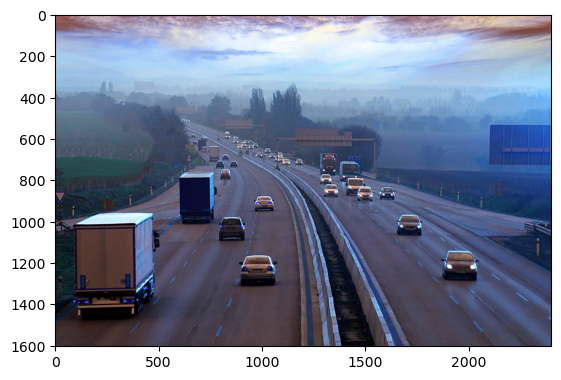

In [25]:
plt.subplot(1, 1, 1)
plt.imshow(image)
plt.show()

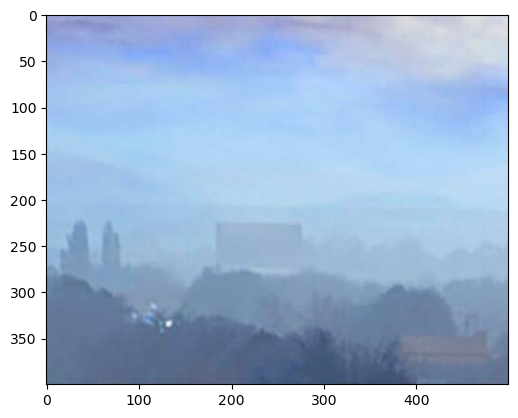

In [26]:
# We will calculate the region of interest 
# by slicing the pixels of the image 
roi_image = image[100 : 500, 200 : 700] 
plt.subplot(1, 1, 1)
plt.imshow(roi_image)
plt.show()

# Resizing the Image

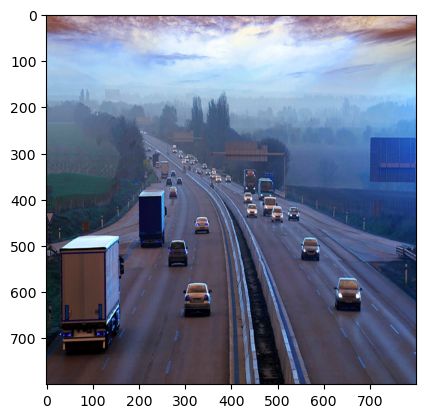

In [27]:
# resize() function takes 2 parameters, 
# the image and the dimensions 
resized_image = cv2.resize(image, (800, 800)) 
# print(resized_image)

plt.subplot(1, 1, 1)
plt.imshow(resized_image)
plt.show()

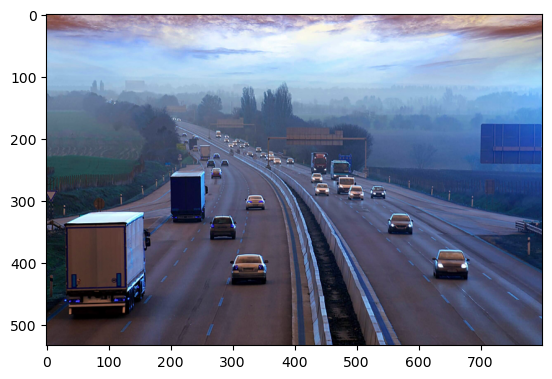

In [28]:
# The problem with this approach is that the aspect ratio of the image is not maintained.
# So we need to do some extra work in order to maintain a proper aspect ratio.

# Calculating the ratio 
ratio = 800 / w 

# Creating a tuple containing width and height 
dim = (800, int(h * ratio)) 

# Resizing the image 
resized_aspect_image = cv2.resize(image, dim) 
#print(resized_aspect_image)

plt.subplot(1, 1, 1)
plt.imshow(resized_aspect_image)
plt.show()

# Rotating the Image

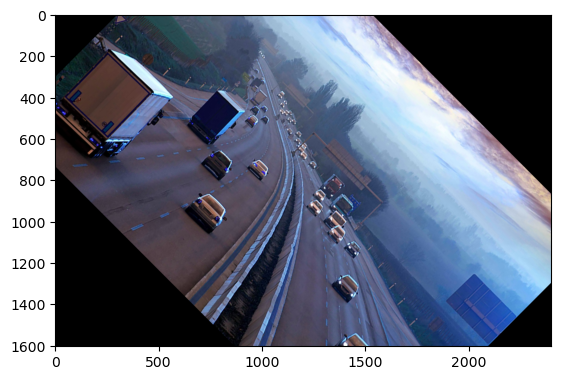

In [29]:
# Calculating the center of the image 
center = (w // 2, h // 2) 

# Generating a rotation matrix 
matrix = cv2.getRotationMatrix2D(center, -45, 1.0) 

# Performing the affine transformation 
rotated_image = cv2.warpAffine(image, matrix, (w, h)) 


plt.subplot(1, 1, 1)
plt.imshow(rotated_image)
plt.show()

# Drawing a Rectangle
It is an in-place operation

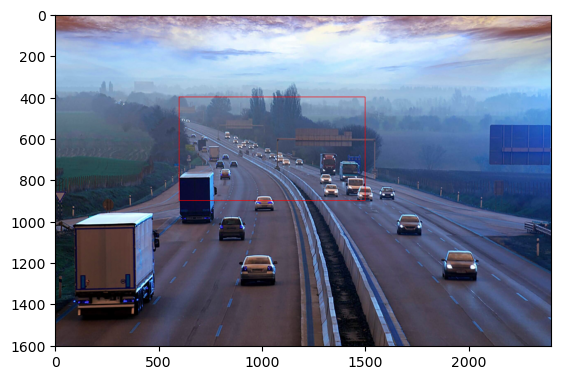

In [30]:
# We are copying the original image, 
# as it is an in-place operation. 
output_image = image.copy() 

# Using the rectangle() function to create a rectangle. 
rectangle = cv2.rectangle(output_image, (1500, 900),(600, 400), (255, 0, 0), 2) 

plt.subplot(1, 1, 1)
plt.imshow(output_image)
plt.show()


# These object detection projects are implemented using haar cascades.

# Object detection project1

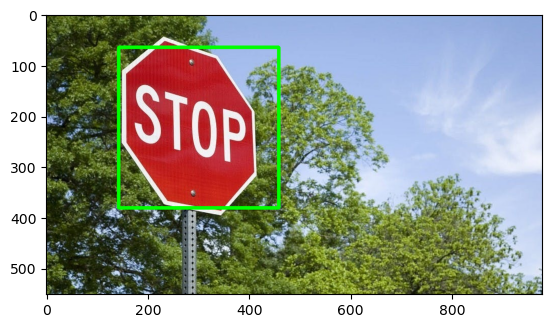

In [31]:
# Object detection project1

import cv2
from matplotlib import pyplot as plt
  
# Opening image
img = cv2.imread("stopSign.jpg")
  
# OpenCV opens images as BRG 
# but we want it as RGB We'll 
# also need a grayscale version
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use minSize because for not 
# bothering with extra-small 
# dots that would look like STOP signs
stop_data = cv2.CascadeClassifier('stop_data.xml')

# We will use the detectMultiScale() function of OpenCV to recognize big signs as well as small ones:
  
found = stop_data.detectMultiScale(img_gray, 
                                   minSize =(20, 20))
  
# Don't do anything if there's 
# no sign
amount_found = len(found)
  
if amount_found != 0:
      
    # There may be more than one
    # sign in the image
    for (x, y, width, height) in found:
          
        # We draw a green rectangle around
        # every recognized sign
        cv2.rectangle(img_rgb, (x, y), (x + height, y + width),(0, 255, 0), 5)
                          
# Creates the environment of 
# the picture and shows it
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

# Object detection project2

In [32]:
import matplotlib.pyplot as plt
import cv2
import os

In [33]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [34]:
# load image

path1='humans_image.jpeg'
if os.path.isfile(path1):
    gray_image = cv2.imread(path1,0)
else:
    print ("The file " + path1 + " does not exist.")

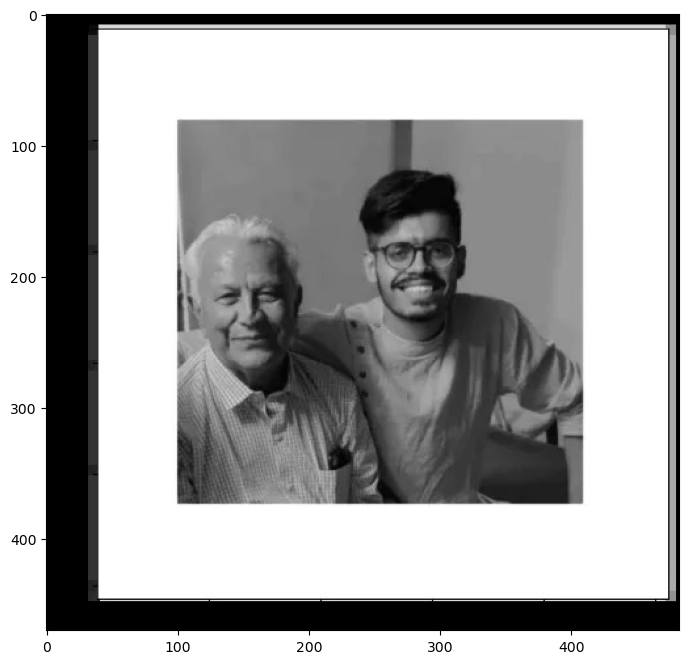

In [35]:
# show gray-scaled image

plt.figure(figsize=(12,8))
plt.imshow(gray_image,cmap="gray")
plt.show()

In [36]:
# Detect faces on image
faces = face_cascade.detectMultiScale(
gray_image,
scaleFactor=1.1,
minNeighbors=5,
flags=cv2.CASCADE_SCALE_IMAGE
)

In [37]:
for (x, y, w, h) in faces:
# Draw rectangle around the face
  cv2.rectangle(gray_image, (x, y), (x+w, y+h), (255, 255, 255), 3)

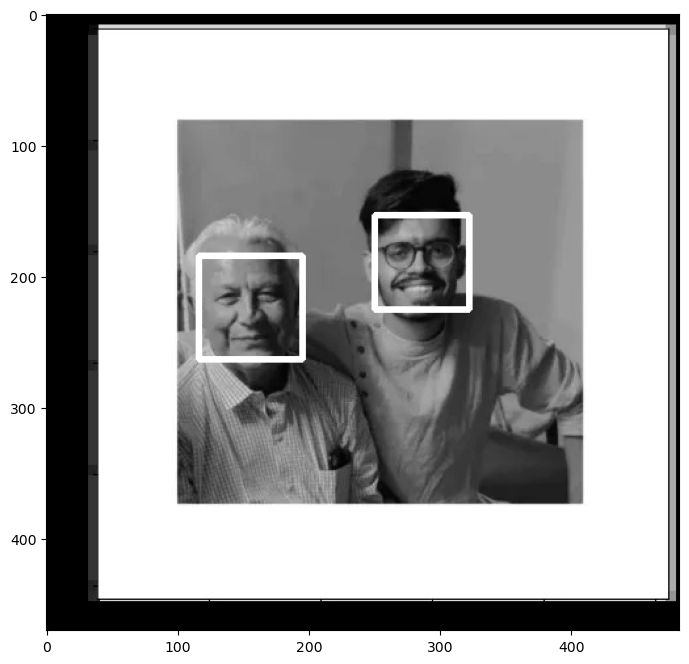

In [38]:
plt.figure(figsize=(12,8))
plt.imshow(gray_image, cmap='gray')
plt.show()